# Weather Classification Using Deep Learning

This notebook demonstrates how to build a neural network to predict the weather category based on features like precipitation, temperature, and wind speed based on the seattle-weather dataset.

---

## Importing Libraries and loading the dataset
---

In [173]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "seattle-weather.csv" 
data = pd.read_csv(file_path)

## Encode the Target Variable
We encode the categorical `weather` column into numerical values using `LabelEncoder`. This transforms normal string labels (e.g., "rain", "drizzle") into integer labels such as 0, 1, 2.

---

In [184]:
# Encode the weather column
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
data.head(20)

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


## Select Our Features and Target Variable
We select the following features for training:
- `precipitation`
- `temp_max`
- `temp_min`
- `wind`

The target variable is the  label-encoded `weather` column.

---

In [185]:
# Select all other columns as features and weather column as target Y
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather_encoded']

## Normalize the Features
To ensure that all input features contribute equally to the neural network, we ned to normalize the data, this can be done by using `MinMaxScaler`. This scales the features to a range of 0 to 1.

In [186]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Convert Weather to One-Hot Encoding
Since this is a multiclass classification problem, we need to convert the target variable into a one-hot encoded format to ensure the model predicts probabilities.

---

In [187]:
# Convert target column to one-hot encoding
y_categorical = to_categorical(y)

## Split the dataset
Split 20% of data to use for the test set to evaluate the model's performance and 80% of the data will be used for the model to train on.

---

In [188]:
# Split 20% of the data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=2)

## Building the Neural Network Model
We construct a simple feed-forward neural network with the following:
- Input Layer: Matches the number of features from train set.
- Hidden Layers: Two dense layers with 64 and 32 neurons, respectively, both with ReLU activation.
- Dropout Layers: 2 dropout layers Added to reduce overfitting.
- Output Layer: Softmax activation to predict probabilities for each weather category.

---

In [189]:
# Build the feed forward model
ff_model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer
    Dense(64, activation='relu'), # 1st hiden layer
    Dropout(0.3), # drop 30% of neurons in each iteration to reduce overfitting
    Dense(32, activation='relu'), # 2nd hidden layer
    Dropout(0.3), # to reduce overfitting again
    Dense(y_train.shape[1], activation='softmax')  # Softmax at output layer for multiclass classification
])

## Compile the Model
We compile the model with the following settings:
- **Optimizer**: Adam (adaptive learning rate).
- **Loss Function**: Categorical Crossentropy (standard for multiclass classification).
- **Metrics**: Accuracy to monitor performance.

---

In [190]:
# Compile
ff_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(ff_model.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,565 (10.02 KB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

None


## Train the Model
The model is trained for 50 epochs (one pass through training dataset) with a batch size of 16. We also validate the model on the test set during training.

---

In [191]:
# Train
history = ff_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3768 - loss: 1.4471 - val_accuracy: 0.5870 - val_loss: 1.0447
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 1.1313 - val_accuracy: 0.6655 - val_loss: 0.9627
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 1.0574 - val_accuracy: 0.7235 - val_loss: 0.9098
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 1.0029 - val_accuracy: 0.7304 - val_loss: 0.8611
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 0.9634 - val_accuracy: 0.7270 - val_loss: 0.8513
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.9573 - val_accuracy: 0.7474 - val_loss: 0.7943
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.8774 - val_accuracy: 0.7304 - val_loss: 0.7829
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.8818 - val_accuracy: 0.7679 - val_loss:

## Step 9: Evaluation Metrics
The model's performance is evaluated with the following metrics:
- **Loss**: Quantifies the error in predictions.
- **Accuracy**: Measures the percentage of correct predictions.

---

In [192]:
# Metrics
loss, accuracy = ff_model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Loss: 0.4910
Accuracy: 0.8567


## Accuracy Plot
---

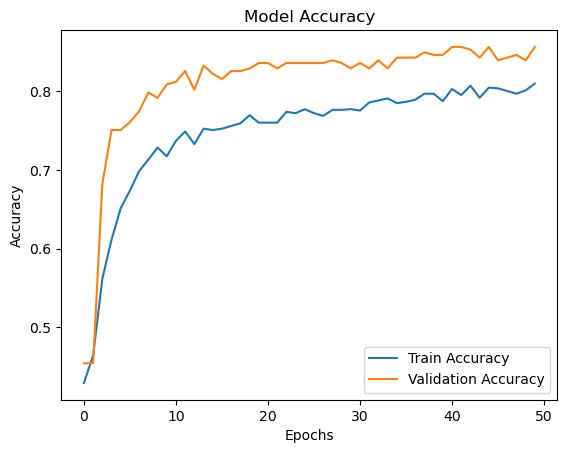

In [27]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Plot
---

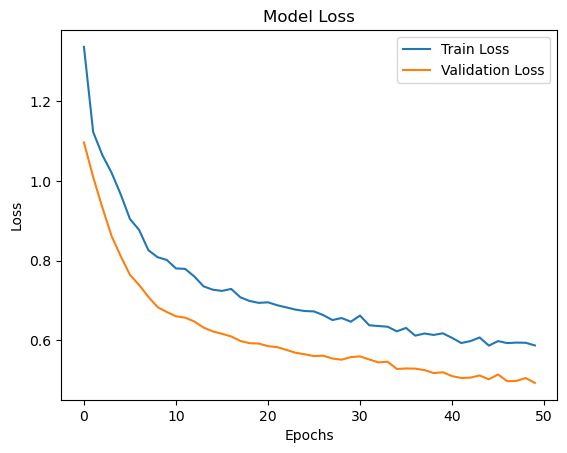

In [28]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Frequency Distribution of Weather Categories
---

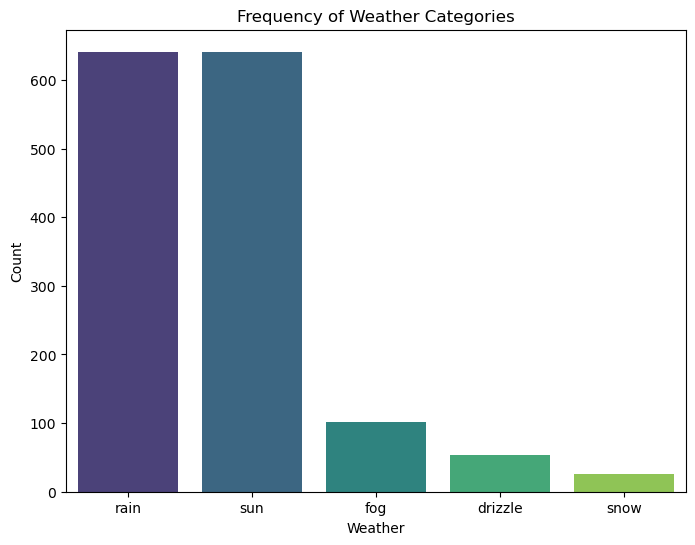

In [29]:
# Count the occurrences of each weather category
weather_counts = data['weather'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, hue=weather_counts.index, 
            dodge=False, palette='viridis', legend=False)
plt.title("Frequency of Weather Categories")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

## Scatterplot Matrix 
---

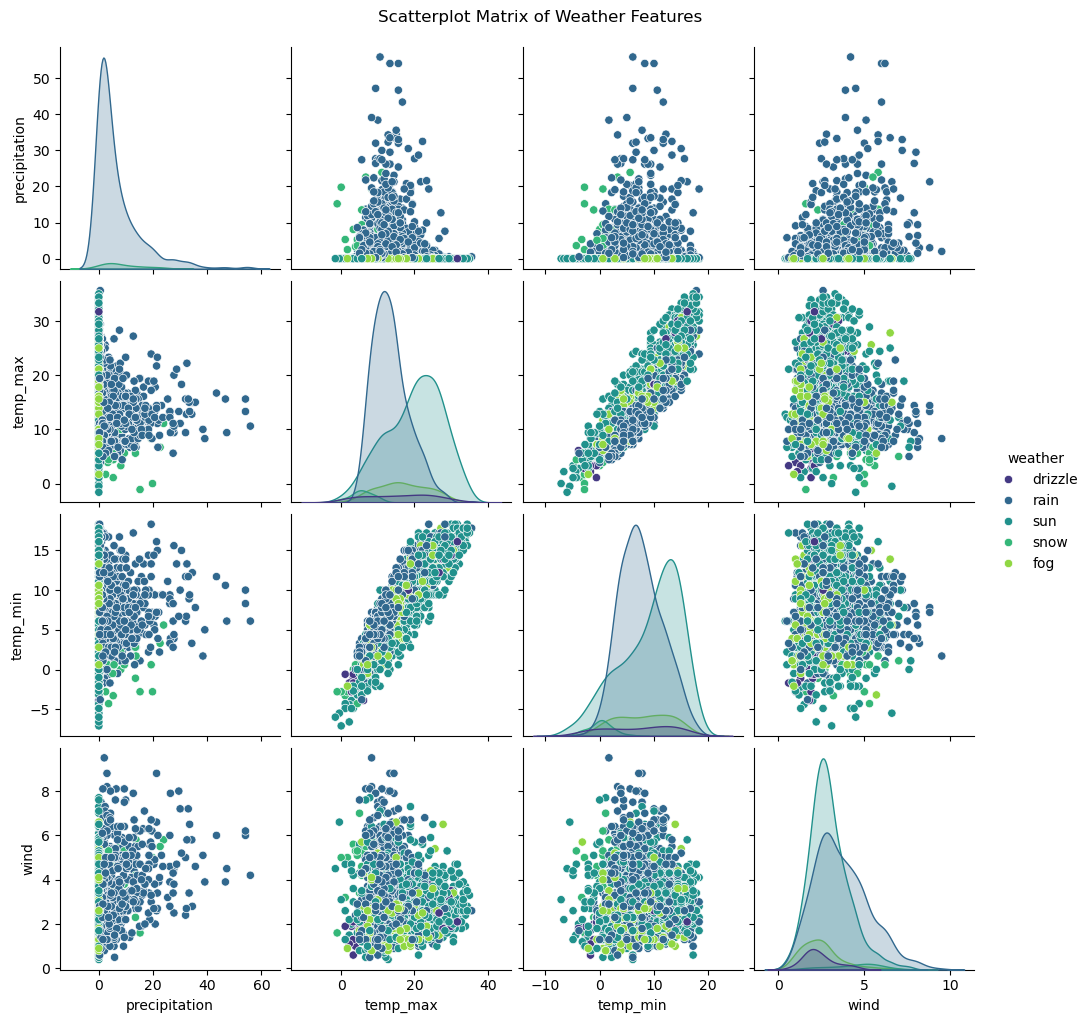

In [35]:
# to get rid of the weather_encoded column/row in the scatterplot
pairplot_data = data[['precipitation', 'temp_max', 'temp_min', 'wind', 'weather']]
# create scatterplot
sns.pairplot(pairplot_data, diag_kind='kde', hue='weather', palette='viridis')
plt.suptitle("Scatterplot Matrix of Weather Features", y=1.02)
plt.show()

## Confusion Matrices
---

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


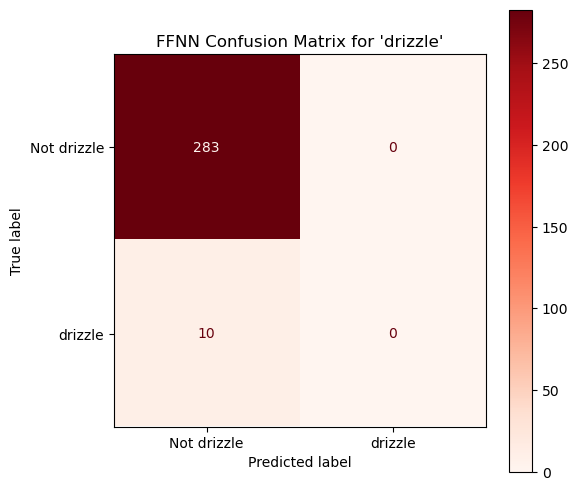

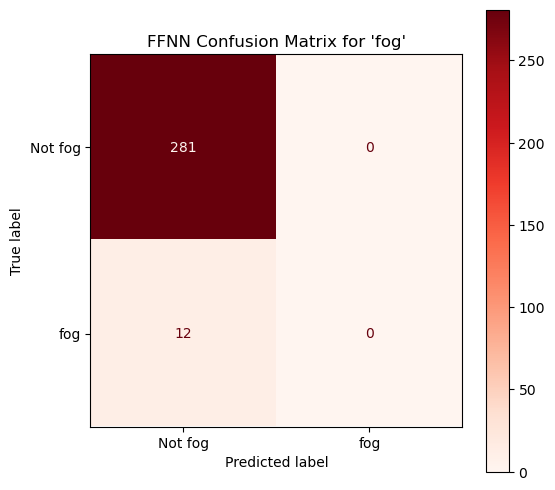

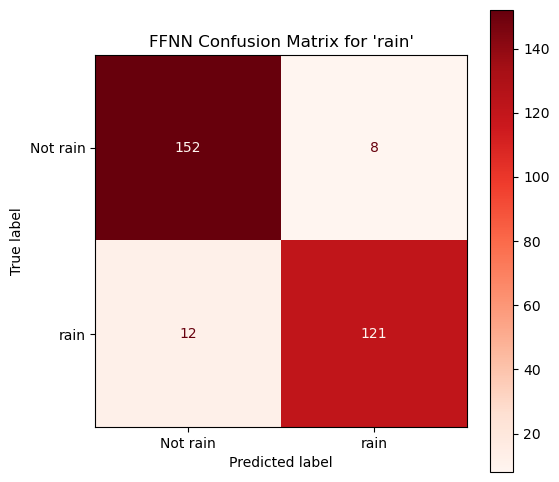

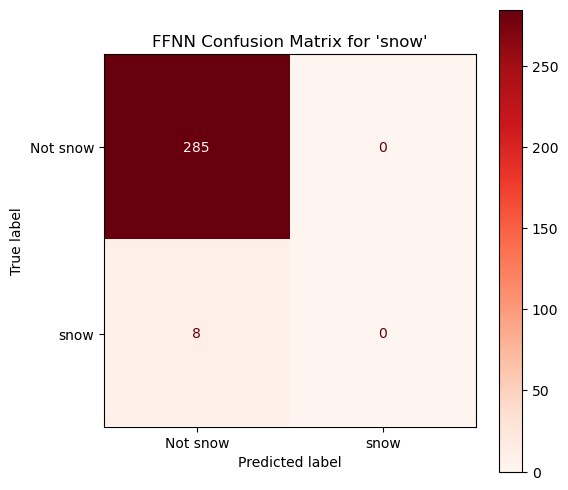

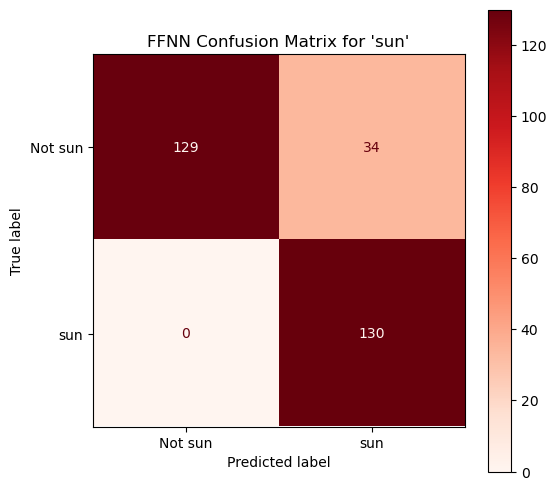

In [57]:
# Generate predictions
y_pred = ff_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from hot encoded back to single label format
y_test_classes = np.argmax(y_test, axis=1)

# Get every class label
labels = label_encoder.classes_

# Generate confusion matrix for each class
for i, label in enumerate(labels):
    
    # Convert predictions and true labels to binary (1 for current class, 0 for all others)
    y_test_binary = (y_test_classes == i).astype(int)
    y_pred_binary = (y_pred_classes == i).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not " + label, label])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap='Reds', ax=ax)
    plt.title(f"FFNN Confusion Matrix for '{label}'")
    plt.show()

## Precision, Recall, and F1-Score
---

In [58]:
# Generate predictions
y_pred = ff_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
# Convert y_test back to single label format
y_test_classes = np.argmax(y_test, axis=1)
# Print Classification Report
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_, zero_division=0))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.94      0.91      0.92       133
        snow       0.00      0.00      0.00         8
         sun       0.79      1.00      0.88       130

    accuracy                           0.86       293
   macro avg       0.35      0.38      0.36       293
weighted avg       0.78      0.86      0.81       293



## Further Verification using row 15 from the dataset
Using the Following inputs.

*   `precipitation` = 2.5
*   `temp_max` = 1.7
*   `temp_min` = -2.8
*   `wind` = 5.0
*   `weather` = 3 (Snow)
---

In [66]:
input_data = pd.DataFrame([[2.5, 1.7, -2.8, 5.0]], columns=['precipitation', 'temp_max', 'temp_min', 'wind'])
# Preprocess the input data
input_scaled = scaler.transform(input_data)  # Using same scaler that we fitted on the training data

# Predic probabilities
predicted_probabilities = model.predict(input_scaled)

# Get the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=1)  # Returns the index of class with the highest probability

# Map the class index to the weather category
predicted_weather = label_encoder.inverse_transform(predicted_class)  # Convert the encoded label to original string labels

# Result
print("The weather is:", predicted_weather[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The weather is: snow


## Potential Next Steps
- **Hyperparameter Tuning**: Experiment with the number of layers, neurons, learning rate, activation functions etc.
- **~~Add confusion matrix metric~~**
- **~~Add Precision Score Metric~~**
- **~~Add Recall Score Metric~~**
- **~~Add F1 Score Metric~~**
- **Look into RNN (Recurrent Neural Network):** Typically used on time series problems such as weather forecasting
- Ex: predicting weater based on last week of weather,
- Seattle dataset in this implementation is consisted of individual and indepedent weather observations for a single day, RNNs are unecessary in this case. We can attempt to use RNN by Transforming the dataset into time series format, by extracting the data and creating a sequence for RNN to train on.
- Current model is a  FFNN (Feed-Forward)
---

## Implementing RNN
---

### **1. Restructure the Dataset into Time Series format**
 Convert the dataset into a time-series format where sequences of past weather features (e.g., past 7 days) predict the weather for the next day.

---

In [193]:
# Normalize the features
scaler = MinMaxScaler()
data[['precipitation', 'temp_max', 'temp_min', 'wind']] = scaler.fit_transform(
    data[['precipitation', 'temp_max', 'temp_min', 'wind']]
)

# Defining a sequence lenth
seq_length = 7
# Label Encode weather column
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
# Create the sequences
X, y = [], []
for i in range(len(data) - seq_length):
    X.append(data[['precipitation', 'temp_max', 'temp_min', 'wind']].iloc[i:i+seq_length].values)
    y.append(data['weather_encoded'].iloc[i+seq_length])  # Target is the next day's weather

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Shape of X: {X.shape}") # (num of samples, sequence length, num of features)
print(f"Shape of y: {y.shape}") 

Shape of X: (1454, 7, 4)
Shape of y: (1454,)


### **2. Split the Data into Training and Testing Sets**
Split the data into training and testing sets.

---

In [194]:
# Split the data, 20% testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3. Build the RNN Model**
Using LSTM for RNN layer, test GRU layer later

---

In [195]:
# Build the RNN model
rnn_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Explicit Input layer
    SimpleRNN(128, activation='tanh', return_sequences=True),  # First SimpleRNN layer
    Dropout(0.3),  # Dropout to prevent overfitting
    SimpleRNN(64, activation='tanh'),  # Second SimpleRNN layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(len(np.unique(y_train)), activation='softmax')  # Softmax for multiclass classification
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(rnn_model.summary())

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 7, 128)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,701 (116.02 KB)

 Trainable params: 29,701 (116.02 KB)

 Non-trainable params: 0 (0.00 B)

None


### **4. Compile and Train the Model** 
Compile the model using a suitable optimizer (e.g., Adam) and loss function (e.g., `sparse_categorical_crossentropy`).
Train the model for multiple epochs.

---

In [200]:
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6384 - loss: 0.9424 - val_accuracy: 0.6495 - val_loss: 0.9290
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6410 - loss: 0.8968 - val_accuracy: 0.6289 - val_loss: 0.9241
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.9671 - val_accuracy: 0.6426 - val_loss: 0.9212
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6375 - loss: 0.9115 - val_accuracy: 0.6460 - val_loss: 0.9283
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6249 - loss: 0.9527 - val_accuracy: 0.6392 - val_loss: 0.9088
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 0.9279 - val_accuracy: 0.6426 - val_loss: 0.9462
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 0.8839 - val_accuracy: 0.6323 - val_loss: 0.9314
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.9366 - val_accuracy: 0.6564 - val_loss:

### **5. Evaluate the Model**
Evaluate the model on the test set to compute accuracy and loss.

---

In [199]:
# Evaluate the model
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.9419
Test Accuracy: 0.6529


### **Verification using the dataset**
---

In [181]:
# print(data.head(7))
# print(data.iloc[:8])
print(data.iloc[:8])

         date  precipitation  temp_max  temp_min  wind  weather  \
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1  2012-01-02           10.9      10.6       2.8   4.5     rain   
2  2012-01-03            0.8      11.7       7.2   2.3     rain   
3  2012-01-04           20.3      12.2       5.6   4.7     rain   
4  2012-01-05            1.3       8.9       2.8   6.1     rain   
5  2012-01-06            2.5       4.4       2.2   2.2     rain   
6  2012-01-07            0.0       7.2       2.8   2.3     rain   
7  2012-01-08            0.0      10.0       2.8   2.0      sun   

   weather_encoded  
0                0  
1                2  
2                2  
3                2  
4                2  
5                2  
6                2  
7                4  


In [182]:
input_sequence = data[['precipitation', 'temp_max', 'temp_min', 'wind']].iloc[:7]
# Scale the input sequence using the same scaler as training
input_scaled = scaler.transform(input_sequence)

# Reshape the input to (1, sequence_length, num_features)
input_scaled = np.expand_dims(input_scaled, axis=0)

# Predict probabilities
predicted_probabilities = rnn_model.predict(input_scaled)

# Get the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=1)  # Index of the predicted class

# Map the predicted class to the weather category
predicted_weather = label_encoder.inverse_transform(predicted_class)

# Print the result
print("The predicted weather is:", predicted_weather[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
The predicted weather is: rain


### **7. Metrics**
Visualize training and validation accuracy/loss across epochs.
Analyze model performance using metrics like confusion matrix, precision, recall, and F1-score.

---

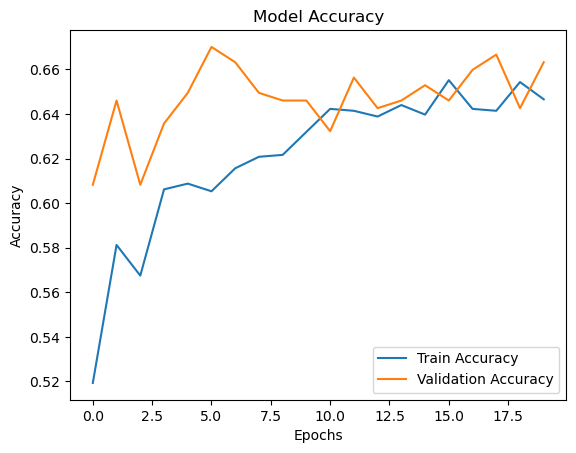

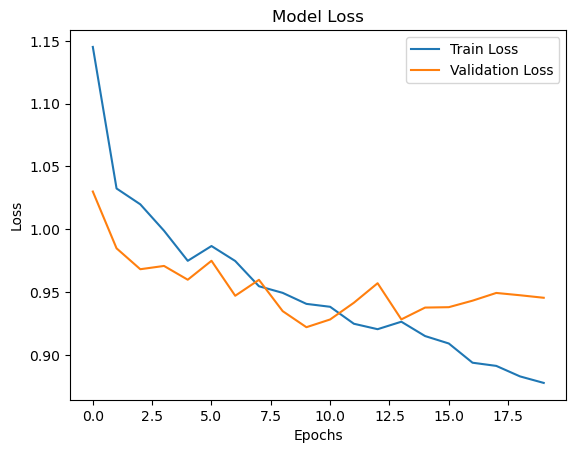

In [136]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [203]:
# debugging

print(data['weather'].value_counts())
#classifcation report
y_pred = np.argmax(rnn_model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

     drizzle       0.33      0.18      0.24        11
         fog       0.00      0.00      0.00        20
        rain       0.71      0.59      0.64       134
        snow       0.00      0.00      0.00         5
         sun       0.56      0.79      0.66       121

    accuracy                           0.61       291
   macro avg       0.32      0.31      0.31       291
weighted avg       0.57      0.61      0.58       291



- **Class imbalance in the dataset may be affecting the performance of the rnn model**
- **Rain and Sun dominating may make the model biased towards the two classes**
- **Few features might be affecting it, try feature engineering.(day of year, month, temp range, or rolling averages)**
- **adjust the architecture of the model?**